## Note
这是一个debug文件，请从lecture-3/homework/beijing-subway/search.py获取整个工程代码

In [106]:
from bs4 import BeautifulSoup
import requests

In [107]:
session = requests.Session()
session.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'

In [265]:
base_url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485#2_1'

def get_url_html(url):
    global session
    html = session.get(url)
    html.encoding='utf-8'
    return html.text

base_page_html = get_url_html(base_url)
base_page_html[:500]

'<!DOCTYPE html>\n<!--STATUS OK-->\n<html>\n\n\n\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="referrer" content="always" />\n<meta name="description" content="北京地铁（Beijing Subway）是服务于中国北京市的城市轨道交通系统，也是国际地铁联盟（CoMET）的14个成员之一，其第一条线路于1971年1月15日正式开通运营，使北京成为中国第一个开通地铁的城市。2017年，北京地铁年乘客量达到45.3亿人次，日均客流为1241.1万人次，单日客运量最高达1327.46万人次。截至2018年12月，北京地铁运营线路共有22条地铁线路，均采用地铁系统，覆盖北京市11个市辖区，运营里程637千米，共设车站391座，开通里程居中国第二位。在建线路15条，共320.8千米。2018年12月30日，北京地铁8号线三期、8号线四期、6号线西延等线路'

In [26]:
import re

In [266]:
def get_lines(html):
    lines = {}
    soup = BeautifulSoup(html)
    contents = soup.find_all('a', {"target":"_blank"})
    for content in contents:
        ret = re.search("a href=\"(.*)\" target=\"_blank\">(北京地铁.*线)<\/a>", str(content))
        if ret:
            lines[ret.group(2)] = ret.group(1)
        #print(ret.group(1) + ret.group(2))
    return lines

In [267]:
lines = get_lines(base_page_html)
lines

{'北京地铁1号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '北京地铁13号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 '北京地铁八通线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
 '北京地铁5号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '北京地铁8号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '北京地铁10号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '北京地铁机场线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
 '北京地铁4号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '北京地铁15号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
 '北京地铁昌平线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF',
 '北京地铁大兴线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%A4%A7%E5%85%B4%E7%BA%BF',
 '北京地铁房山线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%88%BF%E5%B1%B1%E7%BA%BF',
 '北京地铁亦庄线': '/item/%E5%8C%97%E

In [228]:
#link = 'https://baike.baidu.com' + '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%88%BF%E5%B1%B1%E7%BA%BF'
link = 'https://baike.baidu.com' + '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF'
#link = 'https://baike.baidu.com' + '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF'

html = get_url_html(link)
html[:500]

'<!DOCTYPE html>\n<!--STATUS OK-->\n<html>\n\n\n\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="referrer" content="always" />\n<meta name="description" content="北京地铁1号线（以下简称“1号线”），是中国最早的地铁线路。中国第一条地铁。使首都北京成为中国第一个拥有地铁的城市。而且也早于首尔、新加坡、旧金山、华盛顿等城市。毛主席亲自批示“精心设计、精心施工”。朱德、邓小平等国家领导人，北京市市长彭真亲自参加开工典礼。1969年10月1日，第一辆地铁机车从古城站呼啸驶出。北京地铁一期工程赶在新中国成立20周年的时候建成通车了，宣告了中国没有地铁历史的结束。1969年10月1日开始封闭试运营，运行区段由北京站至古城站（原古城路站）。1973年4月23日，北京地铁1号线延长至苹果园站。1981年9月15日北京地下铁道一期工程正式验收，地铁一期工程运'

In [268]:
def get_station_distances(html):
    distances = []
    soup = BeautifulSoup(html)
    contents = soup.find_all('table')
    target_content = ''
    for content in contents:
        if re.search("(.*相邻站间距信息统计表.*|.*站区间.*)", str(content)):
            target_content = str(content)
            break
    #print(target_content)      
    #for content in contents:
    if target_content == '':
        return None
    
    # normal pattern
    #pattern1 = ">([^\x00-\xff]*——.*?)<\/th>.*?>(\d+|\d+米|[0-9]{1,}[.][0-9]*)<\/td>"
    pattern = ">([^\x00-\xff]*[～|~|——].*?)<.*?>(\d+|\d+米|[0-9]{1,}[.][0-9]*)<\/td>"
    #distances = re.findall(">([^\x00-\xff]*——.*?)<\/th>.*?>(\d+|\d+米|[0-9]{1,}[.][0-9]*)<\/td>", target_content)
    distances = re.findall(pattern, target_content)
    if distances:
        return distances
    else:
        #distances = re.findall(">([^\x00-\xff]*[～|~].*?)<.*?>([0-9]{1,}[.][0-9]*|\d*)<\/td>", target_content)
        return None

#print(get_station_distances(html))

In [269]:
def get_all_lines(lines):
    all_lines = {}
    for line, link in lines.items():
        url = 'https://baike.baidu.com' + link
        html = get_url_html(url)
        #print(html[:500])
        station_distances = get_station_distances(html)
        all_lines[line] = station_distances
    return all_lines

all_lines = get_all_lines(lines)
all_lines
#lines

{'北京地铁1号线': [('苹果园——古城', '2606米'),
  ('古城——八角游乐园', '1921米'),
  ('八角游乐园——八宝山', '1953米'),
  ('八宝山——玉泉路', '1479米'),
  ('玉泉路——五棵松', '1810米'),
  ('五棵松——万寿路', '1778米'),
  ('万寿路——公主坟', '1313米'),
  ('公主坟——军事博物馆', '1172米'),
  ('军事博物馆——木樨地', '1166米'),
  ('木樨地——南礼士路', '1291米'),
  ('南礼士路——复兴门', '424米'),
  ('复兴门——西单', '1590米'),
  ('西单——天安门西', '1217米'),
  ('天安门西——天安门东', '925米'),
  ('天安门东——王府井', '852米'),
  ('王府井——东单', '774米'),
  ('东单——建国门', '1230米'),
  ('建国门——永安里', '1377米'),
  ('永安里——国贸', '790米'),
  ('国贸——大望路', '1385米'),
  ('大望路——四惠', '1673米'),
  ('四惠——四惠东', '1714米')],
 '北京地铁13号线': [('西直门——大钟寺', '2839米'),
  ('大钟寺——知春路', '1206米'),
  ('知春路——五道口', '1829米'),
  ('五道口——上地', '4866米'),
  ('上地——西二旗', '2538米'),
  ('西二旗——龙泽', '3623米'),
  ('龙泽——回龙观', '1423米'),
  ('回龙观——霍营', '2110米'),
  ('霍营——立水桥', '4785米'),
  ('立水桥——北苑', '2272米'),
  ('北苑——望京西', '6722米'),
  ('望京西——芍药居', '2152米'),
  ('芍药居——光熙门', '1110米'),
  ('光熙门——柳芳', '1135米'),
  ('柳芳——东直门', '1769米')],
 '北京地铁八通线': [('四惠——四惠东', '1715米'),
  ('四惠东——高碑店', '1375米'),
 

In [318]:
class Station:
    def __init__(self):
        self.line = ''
        self.name = ''
        self.conn = []
        self.dis = {}
        
        
    def set_line(self, line):
        self.line = line    
        
        
    def set_name(self, name):
        self.name = name
        
        
    def add_conn(self, name, dis):
        self.conn.append(name)
        self.dis[name] = dis

In [353]:
ALL_STATIONS = []

def get_station_by_name(name, all_stations):
    for sta in all_stations:
        if name == sta.name:
            return sta
    
    return None

def format_station(all_lines):
    all_stations = []
    
    for line, nodes in all_lines.items():
        if nodes == None:
            continue
            
        for conn_node in nodes:
            # get start and end
            node = re.search("([\u4e00-\u9fff]+).*[～|~|——]([\u4e00-\u9fff]+)", str(conn_node[0]))
            dis = re.search("(\d+|[0-9]{1,}[.][0-9]*)", str(conn_node[1]))
            if node and dis:
                #print(node.group(1))
                #print(int(conn_node[1]))
                
                name = node.group(1)
                
                if get_station_by_name(name, all_stations) == None:
                    station = Station()
                    station.set_line(line)
                    station.set_name(node.group(1))
                
                    if float(dis.group()) > 10:
                        dis = float(dis.group()) / 1000
                    else:
                        dis = float(dis.group())
                    
                    station.add_conn(node.group(2), dis)
                    all_stations.append(station)
                else:
                    station = get_station_by_name(name, all_stations)
                    
                    if float(dis.group()) > 10:
                        dis = float(dis.group()) / 1000
                    else:
                        dis = float(dis.group())
                        
                    station.add_conn(node.group(2), dis)
            #print(conn_node[0])
            #print(conn_node[1])
            #new_station = Station(line)
    return all_stations

ALL_STATIONS = format_station(all_lines)

In [354]:

for sta in ALL_STATIONS:
    print(sta.name)
    print(sta.line)
    print(sta.conn)

苹果园
北京地铁1号线
['古城']
古城
北京地铁1号线
['八角游乐园']
八角游乐园
北京地铁1号线
['八宝山']
八宝山
北京地铁1号线
['玉泉路']
玉泉路
北京地铁1号线
['五棵松']
五棵松
北京地铁1号线
['万寿路']
万寿路
北京地铁1号线
['公主坟']
公主坟
北京地铁1号线
['军事博物馆', '西钓鱼台']
军事博物馆
北京地铁1号线
['木樨地']
木樨地
北京地铁1号线
['南礼士路']
南礼士路
北京地铁1号线
['复兴门']
复兴门
北京地铁1号线
['西单', '长椿街']
西单
北京地铁1号线
['天安门西', '宣武门']
天安门西
北京地铁1号线
['天安门东']
天安门东
北京地铁1号线
['王府井']
王府井
北京地铁1号线
['东单']
东单
北京地铁1号线
['建国门', '崇文门']
建国门
北京地铁1号线
['永安里', '朝阳门']
永安里
北京地铁1号线
['国贸']
国贸
北京地铁1号线
['大望路', '双井']
大望路
北京地铁1号线
['四惠']
四惠
北京地铁1号线
['四惠东', '四惠东']
西直门
北京地铁13号线
['大钟寺', '新街口', '车公庄']
大钟寺
北京地铁13号线
['知春路']
知春路
北京地铁13号线
['五道口', '西土城']
五道口
北京地铁13号线
['上地']
上地
北京地铁13号线
['西二旗']
西二旗
北京地铁13号线
['龙泽']
龙泽
北京地铁13号线
['回龙观']
回龙观
北京地铁13号线
['霍营']
霍营
北京地铁13号线
['立水桥', '育新']
立水桥
北京地铁13号线
['北苑', '立水桥南']
北苑
北京地铁13号线
['望京西']
望京西
北京地铁13号线
['芍药居', '望京']
芍药居
北京地铁13号线
['光熙门', '太阳宫']
光熙门
北京地铁13号线
['柳芳']
柳芳
北京地铁13号线
['东直门']
四惠东
北京地铁八通线
['高碑店']
高碑店
北京地铁八通线
['传媒大学']
传媒大学
北京地铁八通线
['双桥']
双桥
北京地铁八通线
['管庄']
管庄
北京地铁八通线
['八里桥']
八里桥
北京地铁八通线
['通州北苑']
通州北苑
北京地铁八通线
['果园']
果园
北京地铁八通线
['九棵

In [359]:
import networkx as nx

%matplotlib inline

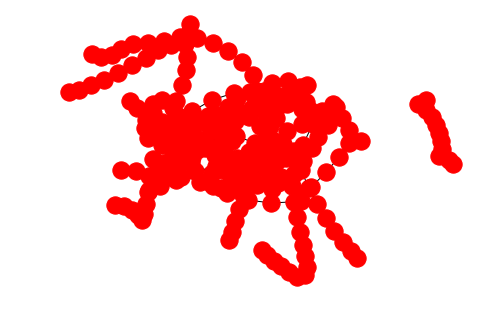

In [362]:
def show_graph(all_stations):
    all_conn_nodes = {}
    
    for sta in all_stations:
       all_conn_nodes[sta.name] = sta.conn
    
    g = nx.Graph(all_conn_nodes)
    nx.draw(g)
    
show_graph(ALL_STATIONS)

In [372]:
base_url = 'http://www.bjsubway.com/station/zjgls/'

def get_url_html(url):
    global session
    html = session.get(url)
    html.encoding='gbk'
    return html.text

html=get_url_html(base_url)
html

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>站间公里数 | 北京地铁官方网站</title>\r\n<meta name="keywords" content="北京地铁官方网站,首末车时间" />\r\n<meta name="description" content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" />\r\n<link rel="shortcut icon" href="http://www.bjsubway.com/favicon.ico" type="image/x-icon" />\r\n<link href="http://www.bjsubway.com/subway/css/common.css" rel="stylesheet" type="text/css" />\r\n<link href="http://www.bjsubway.com/subway/css/search.css" rel="stylesheet" type="text/css" />\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/jquery.js"></script>\r\n<script type="text/javascript" src="http://www.bjsubway.com/subway/js/around.js"></script>\r\n<script type="text/javascript">\r\n/*线路名称多窗口切换效果*/\r\nfunction GetId(id){\r\n  return document.getElementBy

In [397]:
def get_lines(html):
    all_lines = {}
    soup = BeautifulSoup(html)
    contents = soup.find_all('div', {"class":"con_text"})
    for content in contents:
        #print(content)
        #ret = re.findall(">(.*)相邻站间距信息统计表<.|\n*([^\x00-\xff]*——[^\x00-\xff]*).*\n.*?(\d+)<\/td>", str(content))
        ret = re.findall(">(.*)相邻站间距信息统计表<.|\n*([\u4e00-\u9fff|\w]*——[\u4e00-\u9fff|\w]*).*\n.*?(\d+)<\/td>", str(content))
        if ret:
            #print((ret[1][1], ret[1][2]))
            stations = []
            for i in range(1, len(ret)):
                stations.append((ret[i][1], ret[i][2]))
            all_lines[ret[0][0]] = stations
            #print(ret.group(3)[0])
            #print("{} {} {}".format(ret.group(1), ret.group(2), ret.group(3)))
    
    return all_lines

lines = get_lines(html)
lines

{'1号线': [('苹果园——古城', '2606'),
  ('古城——八角游乐园', '1921'),
  ('八角游乐园——八宝山', '1953'),
  ('八宝山——玉泉路', '1479'),
  ('玉泉路——五棵松', '1810'),
  ('五棵松——万寿路', '1778'),
  ('万寿路——公主坟', '1313'),
  ('公主坟——军事博物馆', '1172'),
  ('军事博物馆——木樨地', '1166'),
  ('木樨地——南礼士路', '1291'),
  ('南礼士路——复兴门', '424'),
  ('复兴门——西单', '1590'),
  ('西单——天安门西', '1217'),
  ('天安门西——天安门东', '925'),
  ('天安门东——王府井', '852'),
  ('王府井——东单', '774'),
  ('东单——建国门', '1230'),
  ('建国门——永安里', '1377'),
  ('永安里——国贸', '790'),
  ('国贸——大望路', '1385'),
  ('大望路——四惠', '1673'),
  ('四惠——四惠东', '1714')],
 '2号线': [('西直门——车公庄', '909'),
  ('车公庄——阜成门', '960'),
  ('阜成门——复兴门', '1832'),
  ('复兴门——长椿街', '1234'),
  ('长椿街——宣武门', '929'),
  ('宣武门——和平门', '851'),
  ('和平门——前门', '1171'),
  ('前门——崇文门', '1634'),
  ('崇文门——北京站', '1023'),
  ('北京站——建国门', '945'),
  ('建国门——朝阳门', '1763'),
  ('朝阳门——东四十条', '1027'),
  ('东四十条——东直门', '824'),
  ('东直门——雍和宫', '2228'),
  ('雍和宫——安定门', '794'),
  ('安定门——鼓楼大街', '1237'),
  ('鼓楼大街——积水潭', '1766'),
  ('积水潭——西直门', '1899')],
 '4号线': [('安河桥北——北宫门', '1363')

In [ ]:

s = sorted(s, key = lambda x: (x[1], x[2]))